In [1]:
import sys
# MC: need to specify path to remo in notebook
local_path_to_repo =  'C:/Users/Andrea.LaRosa/Desktop/Projects/repo/rem_repo/remo-python'

sys.path.insert(0, local_path_to_repo)

In [2]:
%load_ext autoreload
%autoreload 2
import remo

(\(\ 
(>':') Remo server is running: {'version': '0.3.3'}


# Basic functionalities
- Create dataset
- Visualize the dataset in the UI
- List and retrieve existing dataset
- Add data to existing dataset
- Print annotations statistcs
- Visualize statistics dashboard

## Create and visualize a dataset


Let's create a new dataset. 

The following code will create an entry in our database, which allows us explore the data via the remo app.

How to load data:
- We can pass an url to a remote archive, containing images and optionally annotations
- We can also pass paths to local data, as folders or list of files

When creating a dataset, we would also need to specify the name of the dataset and the task of the annotation, if any. 

Read more about what type of annotation tasks and formats we support in [our documentation](https://remo.ai/docs/annotation-formats/).






In [3]:
urls = ['https://remo-scripts.s3-eu-west-1.amazonaws.com/open_images_sample_dataset.zip']

my_dataset = remo.create_dataset(name = 'open images detection',
                    urls = urls,
                    annotation_task = "Object detection")


{'top3_classes': [], 'is_public': False, 'annotation_sets': [], 'total_annotation_objects': 0, 'created_at': '2019-11-19T14:35:37.388157Z', 'id': 91, 'name': 'open images detection', 'license': None, 'total_classes': 0, 'users_shared': []}
{'annotations': 0, 'files uploaded': 0}




We can now visualize the dataset - this will open the UI in a separate window:

In [4]:
my_dataset.view()

Open http://localhost:8000/datasets/91


We can later on add additional data to the dataset

In [5]:
urls = ['https://remo-sample-datasets.s3-eu-west-1.amazonaws.com/open-image-sample_142.zip']

my_dataset.add_data(urls = urls, 
                    annotation_task = "Object detection")

{'annotations': 0, 'files uploaded': 0}


{'urls_upload_result': {'annotations': 0, 'files uploaded': 0}}

## List datasets & retrieve a specific dataset

Let's list all of the datasets we uploaded in our local remo:

In [6]:
my_datasets = remo.list_datasets() 
my_datasets

[Dataset 50 - 'small_oid',
 Dataset 74 - 'empty_dt',
 Dataset 91 - 'open images detection']

we can then get a remo dataset using its id

In [9]:
my_dataset = remo.get_dataset(91)

## Explore annotations

To explore annotations, we can print the stats of the annotation sets:

In [12]:
my_dataset.get_annotation_statistics()

[{'AnnotationSet ID': 37,
  'AnnotationSet name': 'Object detection',
  'creation_date': None,
  'last_modified_date': '2019-11-19T14:39:51.309053Z',
  'n_classes': 129,
  'n_images': 152,
  'n_objects': 1092,
  'top_3_classes': [{'count': 74, 'name': 'Person'},
   {'count': 70, 'name': 'Wheel'},
   {'count': 60, 'name': 'Clothing'}]}]

Or we can view an interactive graph on the UI:

In [13]:
my_dataset.view_annotation_statistics()

Open http://localhost:8000/annotation-detail/37/intro


----
# Annotation Sets

Under the hood, Remo groups annotations in **Annotation Sets**. 

An Annotation Set is defined by:
- a task (currently, one of: object detection, instance segmentation, image classification)
- a list of classes to use
- a list of of annotations for each image
- a list of tags for each image

The nice thing about explictly grouping annotations together is that we can easily manipulate these annotations to cover a variety of use cases, e.g.:

- create a copy of annotation set
- experiment grouping together classes or further separate objects of one class, based on models performance
- use tags to group together certain type of images
- compare annotations from different annotators

### How does it work 
Each dataset can have a number of different annotation set.
To simplify things, Remo allows to select a *default* annotation set so that when an annotation set is not specified, it will be assumed that you refer to the default annotaiton set.

The default annotation is the first annotation set you create - but this can be changed by passing the chosen annotation set id to  `dataset.default_annotation_set`

<br>

Before running the code below, I have manually created an annotation set from the UI:
<br>
<br>


In [17]:
# this updates the dataset object to match the db
my_dataset.fetch()
my_dataset.annotation_sets

[Annotation set 37 - 'Object detection', task: Object detection, #classes: 129,
 Annotation set 38 - 'animal_plant_object', task: Image classification, #classes: 0]

In [18]:
my_dataset.default_annotation_set

Annotation set 37 - 'Object detection', task: Object detection, #classes: 129

### Annotate a specific annotation set

In [19]:
my_dataset.view_annotate(38)

Open http://localhost:8000/annotation/38


Example of annotation tool:

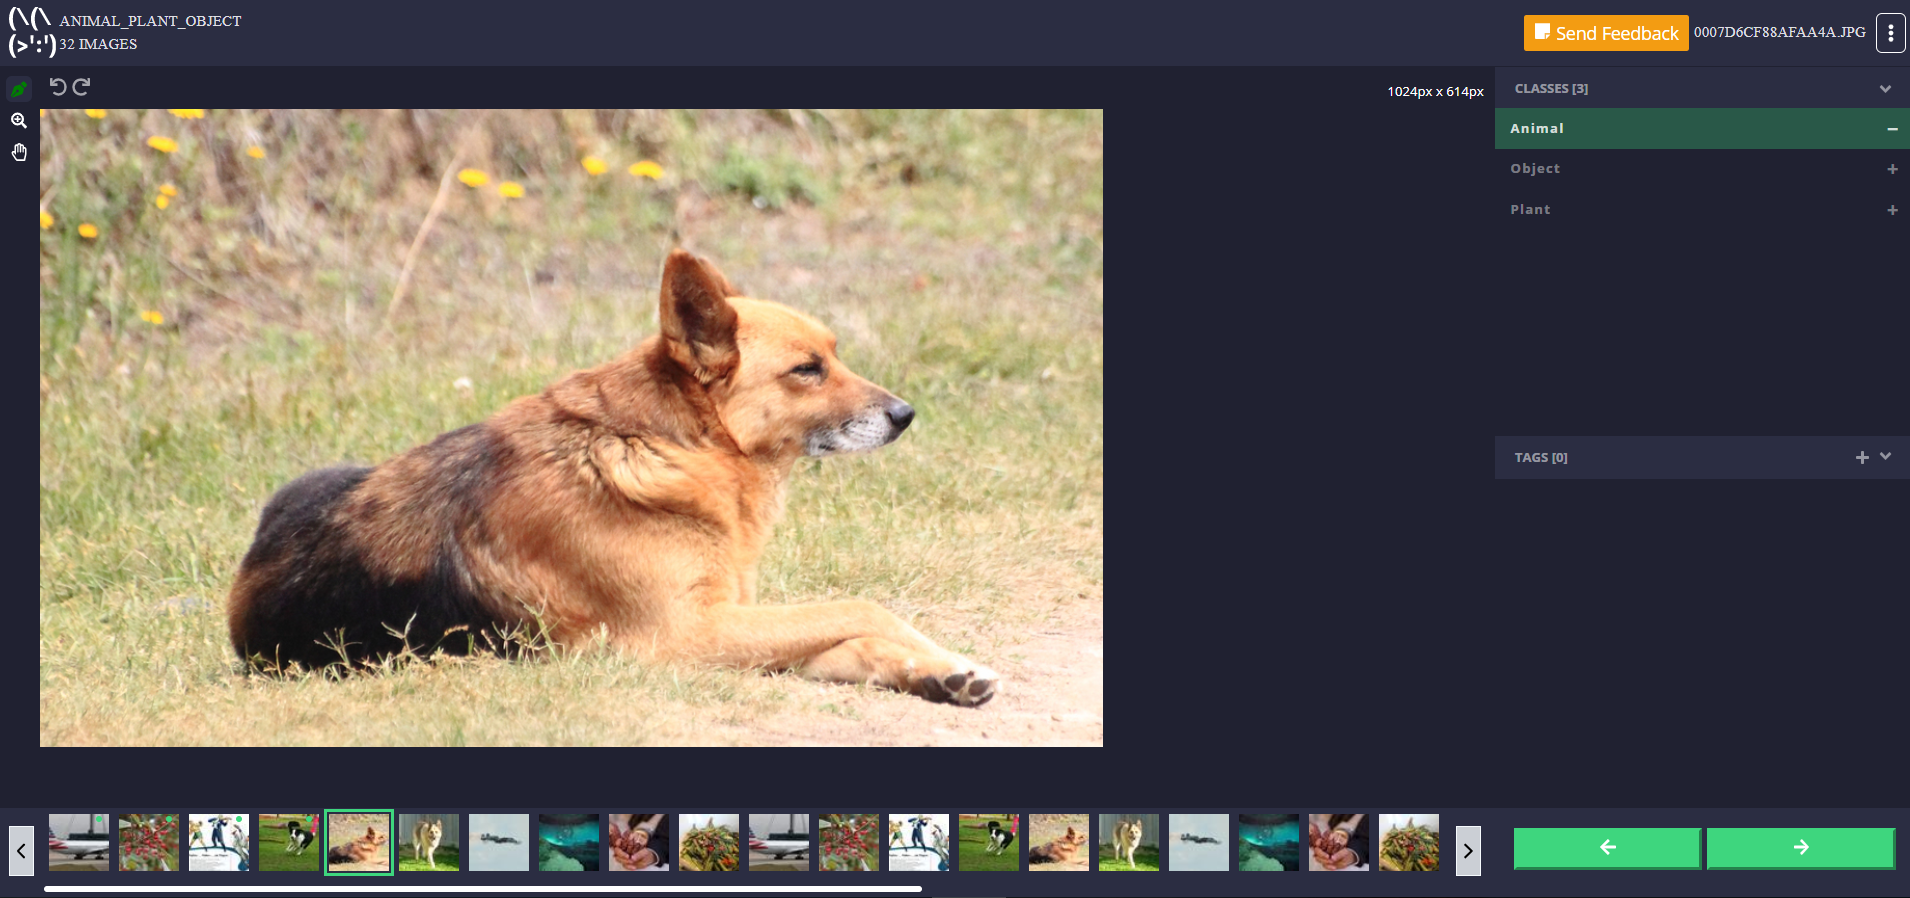

Now, if we list datasets again the datasets we have, we will see an increased number of objects in the annotation set "animal_plant_object"


In [20]:
my_dataset.fetch()
my_dataset.annotation_sets

[Annotation set 37 - 'Object detection', task: Object detection, #classes: 129,
 Annotation set 38 - 'animal_plant_object', task: Image classification, #classes: 3,
 Annotation set 39 - 'odd_objects', task: Object detection, #classes: 0]

In [21]:
my_dataset.get_annotation_statistics(38)

[{'AnnotationSet ID': 38,
  'AnnotationSet name': 'animal_plant_object',
  'creation_date': None,
  'last_modified_date': '2019-11-19T15:46:20.630731Z',
  'n_classes': 3,
  'n_images': 4,
  'n_objects': 0,
  'top_3_classes': [{'count': 2, 'name': 'Object'},
   {'count': 2, 'name': 'Animal'},
   {'count': 1, 'name': 'Plant'}]}]

In [22]:
my_dataset.view_annotation_statistics(38)

Open http://localhost:8000/annotation-detail/38/intro


### Get annotations

We can get annotations of our dataset using get_annotatins(). If annotation_set_id is not specified it returns default annotations.

In [23]:
annotation_sample = my_dataset.get_annotations()

In [24]:
annotation_sample[0]

{'annotations': [{'bbox': {'xmax': 987.3413119999999,
    'xmin': 23.217183744,
    'ymax': 357.84427209,
    'ymin': 31.75409775},
   'classes': ['Airplane']}],
 'file_name': '0001eeaf4aed83f9.jpg',
 'height': 447,
 'tags': [],
 'task': 'Object detection',
 'width': 1024}

### Export annotations to csv

In [27]:
my_dataset.export_annotation_to_csv(output_file='output.csv')

In [32]:
import pandas as pd
df = pd.read_csv('output.csv')
df.head()

,file_name,class,xmin,ymin,xmax,ymax
0,0001eeaf4aed83f9.jpg,Airplane,31.754098,987.341312,23.217184,357.844272
1,000595fe6fee6369.jpg,Food,0.000000,1024.000000,0.000000,681.000000
2,000595fe6fee6369.jpg,Fruit,460.543248,183.988224,144.777626,498.292692
3,000595fe6fee6369.jpg,Fruit,203.847012,259.393229,218.674514,241.596443
4,000595fe6fee6369.jpg,Fruit,333.705105,295.587615,238.279813,371.454555


In [33]:
my_dataset.export_annotation_to_csv(annotation_set_id=38, output_file='output2.csv')
df2 = pd.read_csv('output2.csv')
df2.head()

,file_name,class
0,0001eeaf4aed83f9.jpg,Object
1,000595fe6fee6369.jpg,Plant
2,00075905539074f2.jpg,Object
3,0007cebe1b2ba653.jpg,Animal
4,0007d6cf88afaa4a.jpg,Animal


# Search Images

### View search bar 

Browse the search bar in Remo

In [34]:
remo.view_search()

Open http://localhost:8000/datasets/filtered/images


### Search images by class and task

Let's search for images within our dataset that have both a dog and a person in it.

In [38]:
result = my_dataset.search_images(class_list=['Dog,person'], task=remo.task.object_detection)

In [37]:
result[0]

{'annotations': {'classes': ['Person',
   'Footwear',
   'Dog',
   'Human arm',
   'Human leg',
   'Mammal',
   'Trousers'],
  'coordinates': [[{'x': 753.6519168, 'y': 15.110619601999998},
    {'x': 948.4837888000001, 'y': 275.01326938}],
   [{'x': 430.44247552, 'y': 123.90708019},
    {'x': 812.5545472, 'y': 492.6061687}],
   [{'x': 750.63129088, 'y': 18.132742976000003},
    {'x': 841.2507136, 'y': 275.01326938}],
   [{'x': 845.7817087999999, 'y': 4.533185744000001},
    {'x': 953.014784, 'y': 256.8805346}],
   [{'x': 752.1416192, 'y': 0.0}, {'x': 954.5250815999999, 'y': 252.34734066}],
   [{'x': 749.1209728, 'y': 0.0}, {'x': 963.58703104, 'y': 265.94690882}],
   [{'x': 919.7876223999999, 'y': 229.68141194},
    {'x': 951.504384, 'y': 252.34734066}],
   [{'x': 795.9409664, 'y': 0.0},
    {'x': 823.1268352000001, 'y': 13.599557915}]]},
 'dataset_id': 91,
 'dimensions': [1024, 683],
 'image_id': 34600,
 'name': '0007cebe1b2ba653.jpg',
 'preview': '/media/dataset_previews/535138a1f4bf1a

List images in a dataset

In [42]:
my_list = my_dataset.list_images()
my_list[:5]

[{'id': 34597, 'name': '0001eeaf4aed83f9.jpg'},
 {'id': 34598, 'name': '000595fe6fee6369.jpg'},
 {'id': 34599, 'name': '00075905539074f2.jpg'},
 {'id': 34600, 'name': '0007cebe1b2ba653.jpg'},
 {'id': 34601, 'name': '0007d6cf88afaa4a.jpg'}]

### View images

In [43]:
my_dataset.view_image(34597)

Open http://localhost:8000/image/34597?datasetId=91


### Plot Images by ID

We can get and plot images using directly through dataset.get_images(image_id) 

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 

result = my_dataset.get_images_by_id(34597)
img = Image.open(result)
img = img.save("img.jpg") 

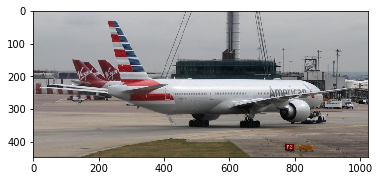

In [45]:
image = plt.imread('img.jpg')
fig, ax = plt.subplots()
im = ax.imshow(image)
plt.show()

### Plot Images by Classes and Tasks

You can get images by filtering classes and tasks

In [49]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 

result = my_dataset.get_images_by_search(class_list=['Dog'], task=remo.task.object_detection)


In [52]:
result[0:3]

[{'classes': ['Person',
   'Footwear',
   'Dog',
   'Human arm',
   'Human leg',
   'Mammal',
   'Trousers'],
  'img': <_io.BytesIO at 0x25975141308>,
  'task': 'Object detection'},
 {'classes': ['Dog'],
  'img': <_io.BytesIO at 0x25978061d58>,
  'task': 'Object detection'},
 {'classes': ['Dog'],
  'img': <_io.BytesIO at 0x259750f7f10>,
  'task': 'Object detection'}]

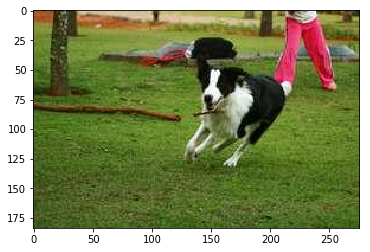

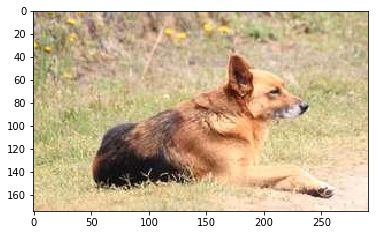

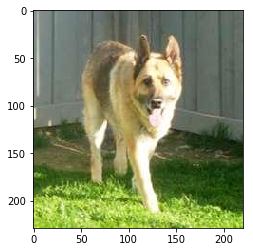

In [53]:
for _img in result[0:3]:
    im = Image.open(_img['img'])
    im = im.save("im.jpg")
    image = plt.imread('im.jpg')
    fig, ax = plt.subplots()
    im = ax.imshow(image)
    plt.show()